In [1]:
# Importando as bibliotecas
import numpy as np 
import pandas as pd 
import sys
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy
import sklearn

In [2]:
# Armazenando os dados em uma variável
df = pd.read_csv(r'C:/Users/ferna/Desktop/python-projects/creditcard.csv')

In [3]:
# Visualizando as 5 primeiras linhas dos dados.
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Visualizando a quantidade de linhas e colunas que o conjunto de dados tem.
# Conforme mostrado o conjuto de dados possui 284807 linhas e 31 colunas.
df.shape

(284807, 31)

In [5]:
# Visualizar as colunas do nosso conjunto de dados
# Entendendo o que cada coluna é.
# Time é a coluna que contêm os segundos decorrido entre cada transação e a primeira transação.
# Os V's são característica de cada transação.
# As informações foram convertidas para números devido a confidencialidade dos dados com o PCA
# A class tem o valor de 0 e 1 onde 1 significa que ocorreu uma fraude e 0 significa outra coisa que não é fraude.
# A coluna Amount é o valor da transação.
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# Vamos criar um método para obter resultados aleatórios
# do nosso conjunto de dados
# o frac é a porcentagem dos dados que será retornado do conjunto de dados, ou seja, 20% dos dados serão retornados.
# E o rando_state será responsável por gerar resultados aleatórios do nosso conjunto de dados.
dados = df.sample(frac = 0.2, random_state = 1)

In [7]:
# Visualizando o resultado.
dados.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


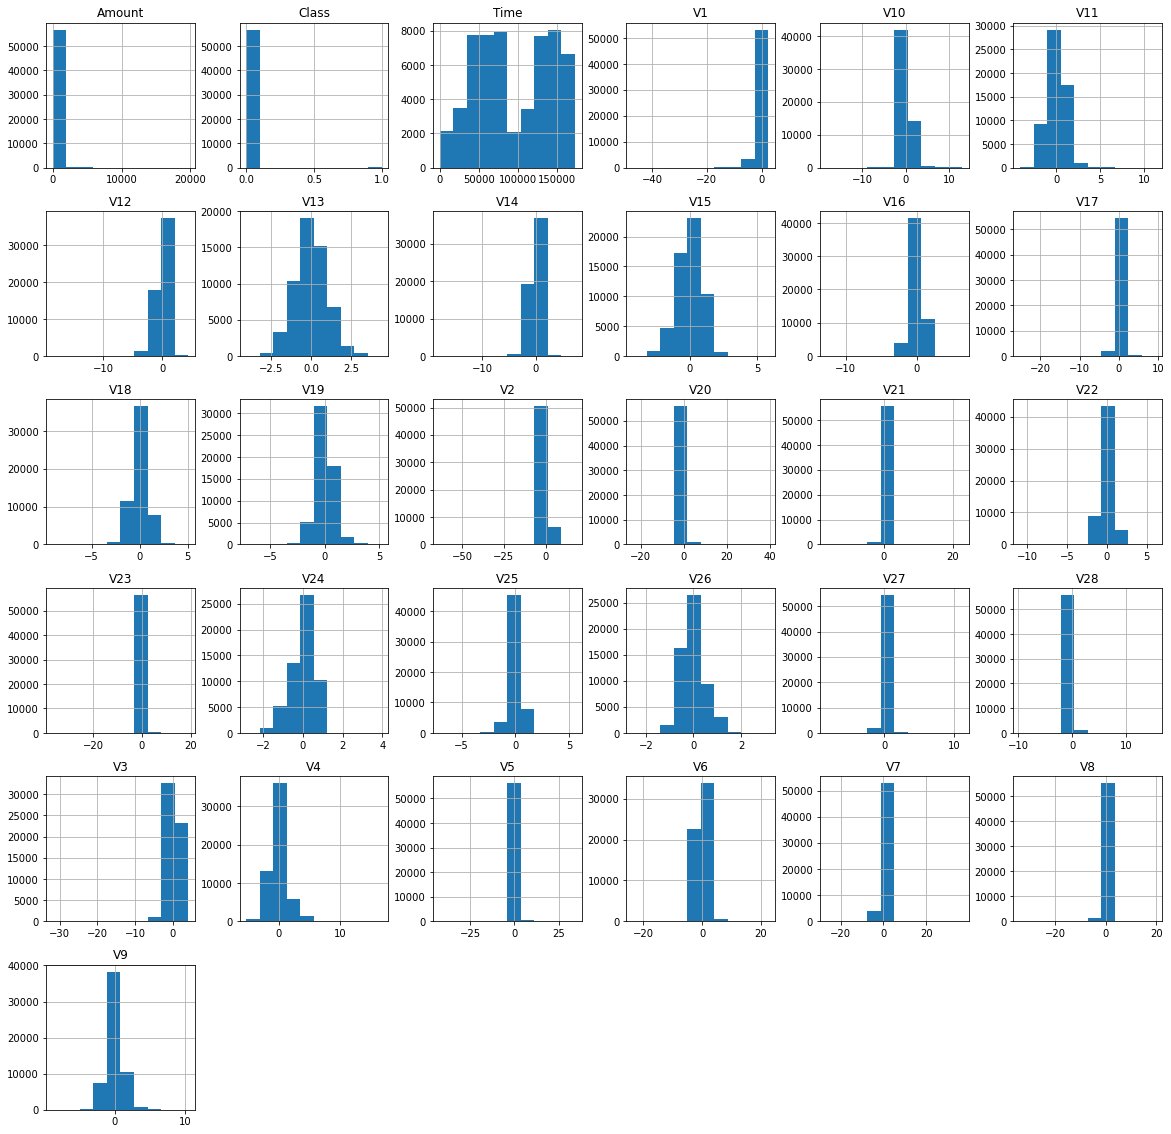

In [8]:
# Vamos plotar um gráfico dos dados obtidos.
# 
dados.hist(figsize = (20,20))
plt.show()

In [31]:
# Vamos determinar o número de caso de fraude ocorrido
fraude = df[df['Class'] == 1]
valido = df[df['Class'] == 0]

fracao_outlier = len(fraude) / float(len(valido))
print(fracao_outlier)

print('Casos de Fraudes: {}'.format(len(fraude)))
print('Casos Válidos: {}'.format(len(valido)))

0.0017304750013189597
Casos de Fraudes: 492
Casos Válidos: 284315


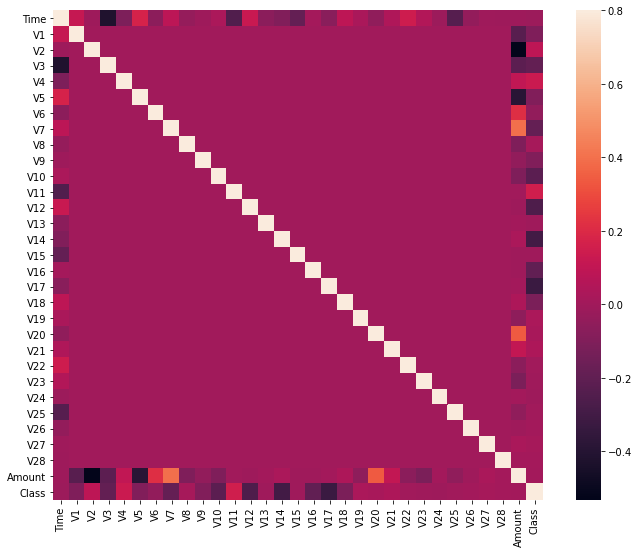

In [32]:
# Matrix de correlação
mat_corr = df.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(mat_corr, vmax= .8, square= True)
plt.show()

## Organizando os dados

In [33]:
# Selecionar as colunas do dataframe e convertendo de matrix para uma lista
colunas = dados.columns.tolist()

In [34]:
#Mostrar lista
colunas

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [35]:
# Agora vamos filtrar as colunas para remover os dados que não queremos
colunas = [c for c in colunas if c not in ['Class']]

In [36]:
# Veja que removemos a coluna Class
colunas

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [37]:
# Armazenar a variável que vamos usar para previsão que é a class
alvo = 'Class'

In [38]:
# Vamos incluir os dados menos a coluna class em uma variável X
X = dados[colunas]

In [39]:
# Vamos incluir todas os dados da variável alvo na variável Y
Y = dados[alvo]

In [20]:
# As variáveis X,Y e alvo serão utilizadas para aplicação de um algoritmo de machine learning.

In [21]:
# Importando as bibliotecas de machine learning
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [40]:
# Definindo um estado aleatório para o nosso modelo
estado = 1

In [41]:
# Definido um método para detecção de outlier
# Para detectar outlier vamos usar um algoritmo de machine learning chamado de isolation Forest.
# Ele é responsável por identificar anomalias isolando outlier no conjunto de dados.
# Contaminatiion é a quantidade de outlier que achamos que deve ter.
# Outro algoritmo de machine learning é o Local Outlier Factor.
# Ele é responsável por calcular o desvio de densidade local.
classificadores = {
    'Isolation Forest': IsolationForest(max_samples = len(X), contamination = fracao_outlier, random_state = estado),
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors = 20, contamination = fracao_outlier)
}

In [48]:
# Ajustando o modelo de machine learning
n_outliers = len(fraude)

for i, (clf_name, clf) in enumerate(classificadores.items()):
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_erros = (y_pred != Y).sum()
    
    print('{}: {}'.format(clf_name, n_erros))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 136
0.9976124014676708
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.25      0.29      0.27        87

    accuracy                           1.00     56961
   macro avg       0.63      0.64      0.63     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor: 182
0.9968048313758536
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.02      0.02      0.02        87

    accuracy                           1.00     56961
   macro avg       0.51      0.51      0.51     56961
weighted avg       1.00      1.00      1.00     56961

